#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Christopher T. Fegalan<br>
Course Code and Title : CPE031 - Visualizations and Data Analysis<br>
Date Submitted : 10/02/2025<br>
Instructor : Mrs. Maria Rizette Sayo


---


**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


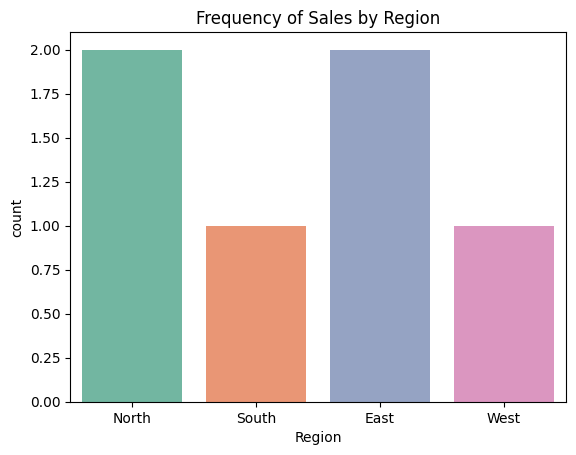

In [59]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


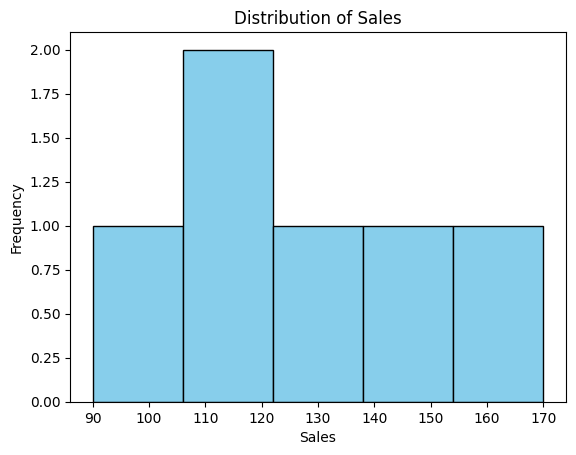

In [60]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-1721561198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="Set2")


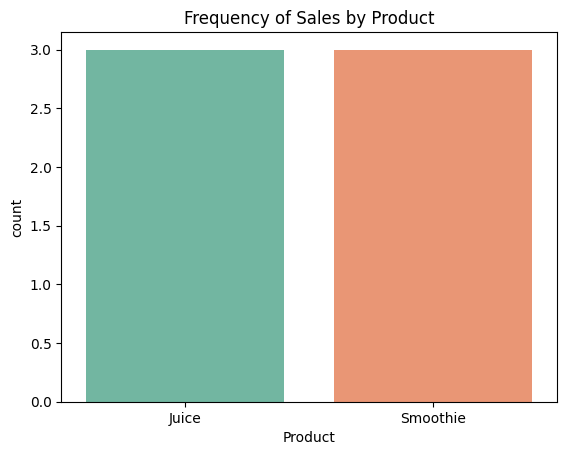

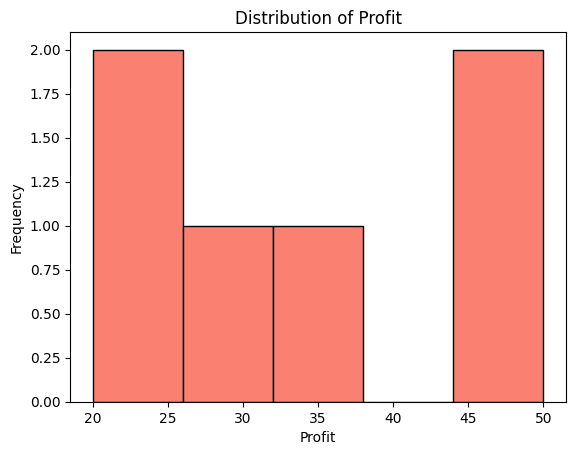

In [61]:
# Countplot for Product
sns.countplot(x="Product", data=df, palette="Set2")
plt.title("Frequency of Sales by Product")
plt.show()

# Histogram for Profit
plt.hist(df["Profit"], bins=5, color="salmon", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Section 2: Relationships Between Variables

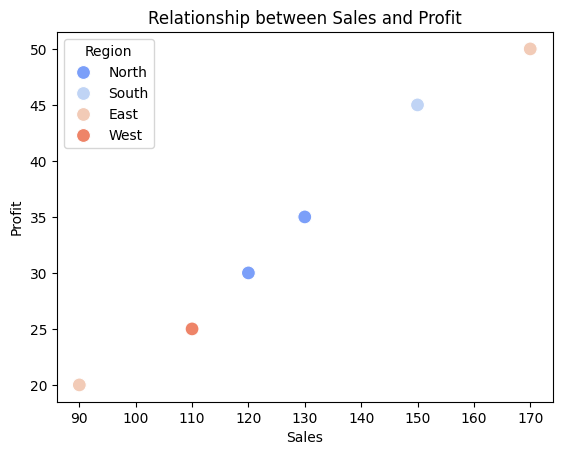

In [62]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [63]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

From the scatterplot of Sales versus Profit, it appears that generally, higher sales are associated with higher profit. Looking at the mean sales by Region and Product, the East region has the highest average sales for Smoothies, and the North region has the highest average sales for Juice. Considering the overall performance in terms of average sales across products, the East region seems to perform best, closely followed by the South region.

Section 3: Analysis of Missing Data

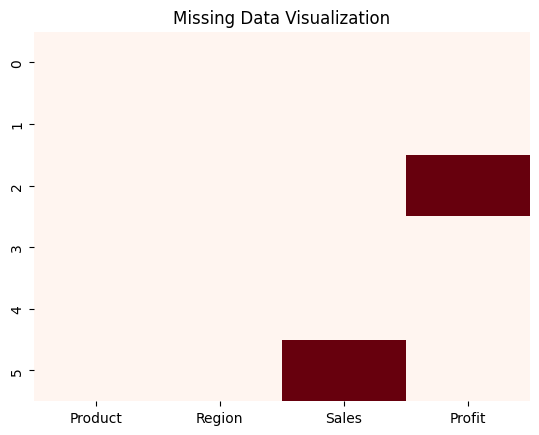

,0
Product,0
Region,0
Sales,1
Profit,1


In [64]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

The missing data visualization on the heatmap shows that most of the dataset is complete, but there are specific missing values in two variables. In particular, one missing value is observed in the “Sales” column and another in the “Profit” column, as indicated by the dark red cells in the heatmap.

The Variables that is needing attention before analysis is Sales and Profit. These two variables contain missing data and need to be handled before performing any further analysis to ensure accurate and reliable results

Section 4: Visualizing Time-Series Data

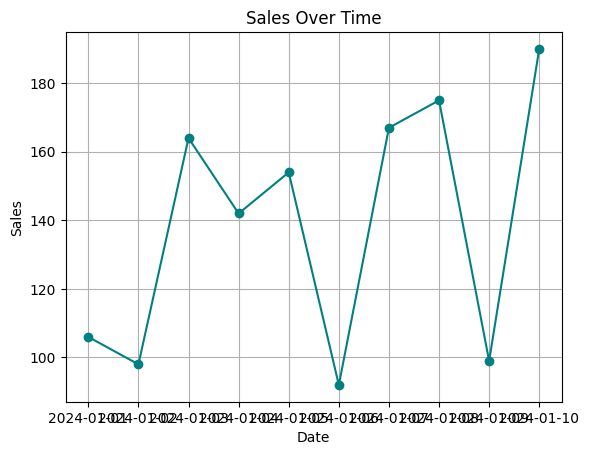

In [65]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

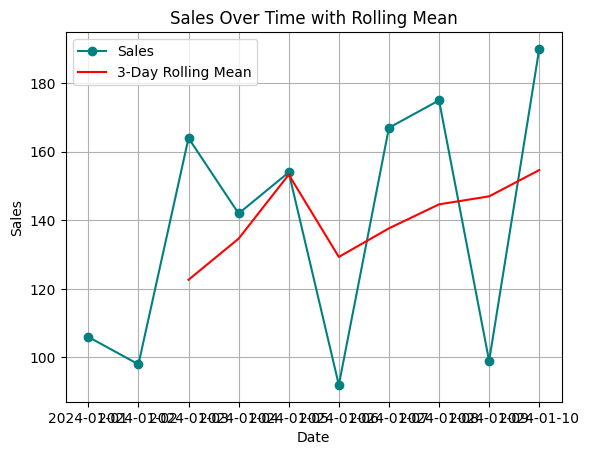

In [66]:
ts_df["Sales_Rolling_Mean"] = ts_df["Sales"].rolling(window=3).mean()

plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")
plt.plot(ts_df["Date"], ts_df["Sales_Rolling_Mean"], color="red", label="3-Day Rolling Mean")
plt.title("Sales Over Time with Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

Section 5: Visualizing Geospatial Data

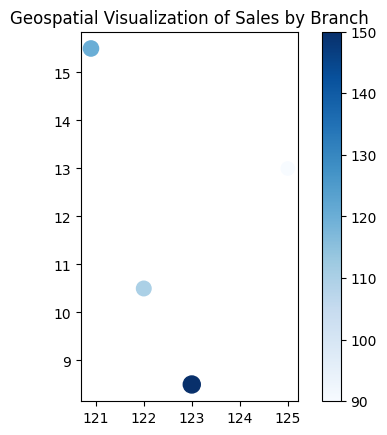

In [67]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

From the geospatial visualization, the South branch shows the highest sales geographically, indicated by the darkest blue color and largest marker size on the map. This suggests that the South branch outperforms the others in terms of sales volume.
In business decision making, Geospatial visualizations help businesses identify regional performance patterns and spot geographical trends in sales. Decision-makers can use this insight to allocate resources more effectively, investigate why certain locations perform better or worse. Plan new branch expansions or targeted marketing campaigns based on strong and weak sales areas.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df  = pd.read_csv("/content/drive/MyDrive/CPE031_FEGALAN/HOA9/LifeStyle_Data.csv")

### Supplementary Activity: Mini Exploratory Analysis

/tmp/ipython-input-874837276.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df.head(100), palette="Set2")


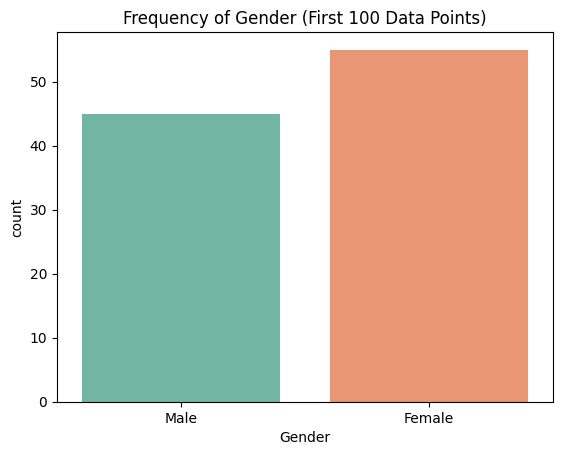

In [70]:
# Categorical Variable Gender
sns.countplot(x="Gender", data=df.head(100), palette="Set2")
plt.title("Frequency of Gender (First 100 Data Points)")
plt.show()

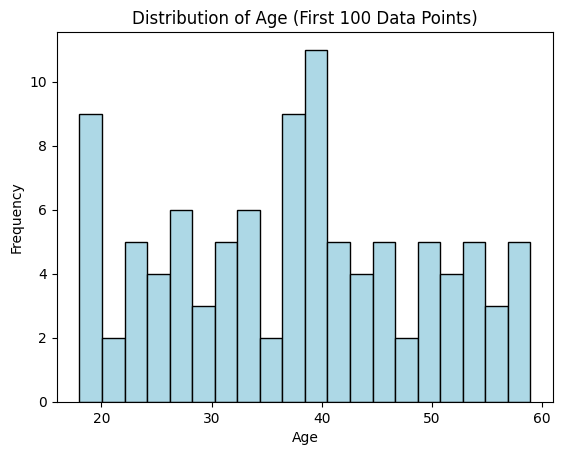

In [71]:
# Quantitative Variable Age
plt.hist(df.head(100)["Age"], bins=20, color="lightblue", edgecolor="black")
plt.title("Distribution of Age (First 100 Data Points)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

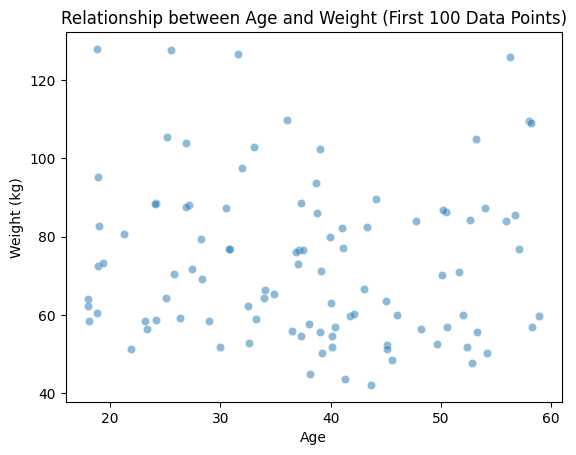

In [72]:
# Bivariate Analysis (Scatterplot)
# Age and Weight
sns.scatterplot(x="Age", y="Weight (kg)", data=df.head(100), alpha=0.5)
plt.title("Relationship between Age and Weight (First 100 Data Points)")
plt.show()

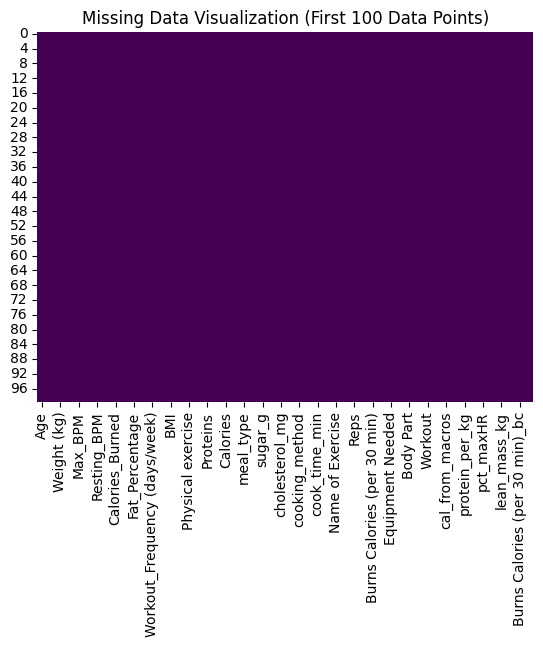


Missing values per column (First 100 Data Points):
Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_

In [73]:
# Missing Data Visualization
sns.heatmap(df.head(100).isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Visualization (First 100 Data Points)")
plt.show()

# Display missing summary
print("\nMissing values per column (First 100 Data Points):")
print(df.head(100).isnull().sum())

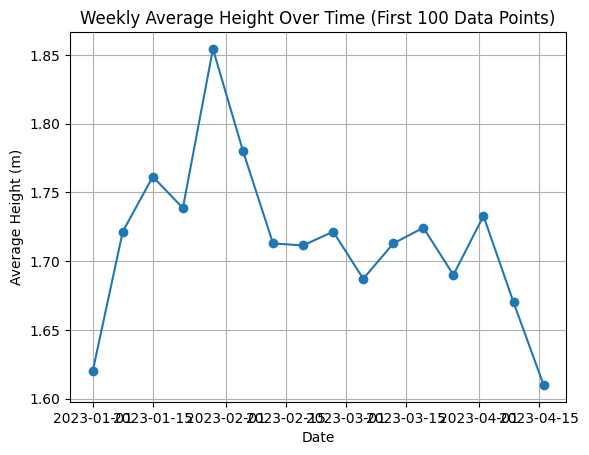

In [74]:
# Time-Series Visualization
if 'Date' not in df.columns:
    df['Date'] = pd.to_datetime(pd.Series(range(len(df))), unit='D', origin='2023-01-01')

df_time_series = df.head(100).set_index('Date').resample('W')['Height (m)'].mean().reset_index()

plt.plot(df_time_series["Date"], df_time_series["Height (m)"], marker="o", linestyle="-")
plt.title("Weekly Average Height Over Time (First 100 Data Points)")
plt.xlabel("Date")
plt.ylabel("Average Height (m)")
plt.grid(True)
plt.show()

### Summary

The visualizations provide an overview of key patterns in the dataset. The gender distribution plot shows how individuals are divided by gender, while the age histogram reveals the most common age ranges. The scatterplot of age versus weight suggests a possible correlation between the two variables. The missing data heatmap highlights columns with incomplete values that require attention before further analysis. Lastly, the time series plot illustrates trends in weekly average height, which could indicate growth patterns or seasonal variations over time.

**6. Conclusion/Learnings/Analysis:**

Through this hands on activity, I gained practical experience in performing basic exploratory data analysis. Visualizing categorical and quantitative variables provided insights into data distribution and patterns. Analyzing relationships between variables through scatterplots helped identify potential correlations. The missing data visualization highlighted the importance of data cleaning before analysis. Finally, time series visualization demonstrated how to observe trends over time, reinforcing the value of visual methods in understanding datasets.